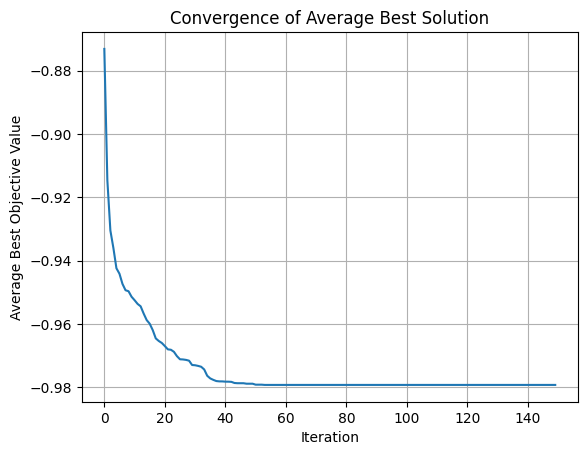

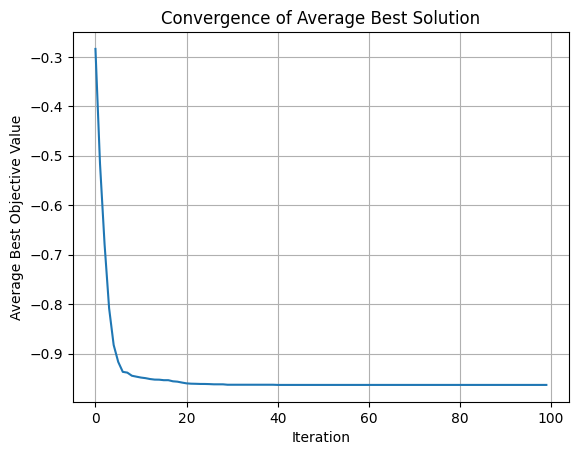

In [1]:

import tkinter as tk
from tkinter import messagebox
import numpy as np
import matplotlib.pyplot as plt


class wolf:
    
    def __init__(self):
        self.num_wolves = 0
        self.num_dimensions = 0
        self.num_iterations = 0
        self.lower_bound = 0
        self.upper_bound = 0
        self.best_objective_values = []

    def set_parameters(self, num_wolves, num_dimensions, num_iterations, lower_bound, upper_bound):
        self.num_wolves = num_wolves
        self.num_dimensions = num_dimensions
        self.num_iterations = num_iterations
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

    def initialize_wolves(self):
        wolves_position = np.random.uniform(self.lower_bound, self.upper_bound, size=(self.num_wolves, self.num_dimensions))
        return wolves_position
    
    def drop(self, xx):
        x1 = xx[0]
        x2 = xx[1]

        if x1 == 0 and x2 == 0:
            return float('inf')

        frac1 = 1 + np.cos(12 * np.sqrt(x1 ** 2 + x2 ** 2))
        frac2 = 0.5 * (x1 ** 2 + x2 ** 2) + 2

        y = -frac1 / frac2
        return y

    def update_alpha_beta_delta(self, wolves_position):
        fitness = np.array([self.drop(ind) for ind in wolves_position])
        sorted_indices = np.argsort(fitness)
        alpha, beta, delta = wolves_position[sorted_indices[:3]]
        return alpha, beta, delta
    
    def update_wolves(self,a, wolves, alpha, beta, delta):
        updated_wolves = np.zeros_like(wolves)
        for i in range(self.num_wolves):
            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A1 = 2 * r1 * a - a
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha - wolves[i])
            X1 = alpha - A1 * D_alpha

            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A2 = 2 * r1 * a - a
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta - wolves[i])
            X2 = beta - A2 * D_beta

            r1 = np.random.random_sample(self.num_dimensions)
            r2 = np.random.random_sample(self.num_dimensions)
            A3 = 2 * r1 * a - a
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta - wolves[i])
            X3 = delta - A3 * D_delta

            updated_wolves[i] = (X1 + X2 + X3) / 3
        return updated_wolves
    
    def optimize(self):
        wolves_position = self.initialize_wolves()
        best_objective_value = float('inf')
        self.best_objective_values = []  # Initialize or reset the list for fitness history
        
        for iteration in range(self.num_iterations):
            a = 2 - 2 * (iteration / self.num_iterations)
            alpha, beta, delta = self.update_alpha_beta_delta(wolves_position)
            wolves_position = self.update_wolves(a, wolves_position, alpha, beta, delta)
            objective_values = [self.drop(wolf) for wolf in wolves_position]
            min_objective_value = min(objective_values)
            if min_objective_value < best_objective_value:
                best_objective_value = min_objective_value
            self.best_objective_values.append(best_objective_value)  # Append the best objective value to the history
        
        best_wolf_index = np.argmin(objective_values)
        best_wolf_position = wolves_position[best_wolf_index]
        best_objective_value = objective_values[best_wolf_index]
        
        return best_wolf_position, best_objective_value


class Application(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Wolf Optimization")
        self.geometry("400x400")
        self.wolf = wolf()
        self.create_widgets()

    def create_widgets(self):
        self.label_runs = tk.Label(self, text="Number of Runs:")
        self.label_runs.pack()
        self.entry_runs = tk.Entry(self)
        self.entry_runs.pack()

        self.label_wolves = tk.Label(self, text="Number of Wolves:")
        self.label_wolves.pack()
        self.entry_wolves = tk.Entry(self)
        self.entry_wolves.pack()

        self.label_dimensions = tk.Label(self, text="Number of Dimensions:")
        self.label_dimensions.pack()
        self.entry_dimensions = tk.Entry(self)
        self.entry_dimensions.pack()

        self.label_iterations = tk.Label(self, text="Number of Iterations:")
        self.label_iterations.pack()
        self.entry_iterations = tk.Entry(self)
        self.entry_iterations.pack()

        self.label_lower_bound = tk.Label(self, text="Lower Bound:")
        self.label_lower_bound.pack()
        self.entry_lower_bound = tk.Entry(self)
        self.entry_lower_bound.pack()

        self.label_upper_bound = tk.Label(self, text="Upper Bound:")
        self.label_upper_bound.pack()
        self.entry_upper_bound = tk.Entry(self)
        self.entry_upper_bound.pack()

        self.button_optimize = tk.Button(self, text="Optimize", command=self.optimize)
        self.button_optimize.pack()

        self.label_avg_solution = tk.Label(self, text="Average Best Solution:")
        self.label_avg_solution.pack()

    def optimize(self):
        try:
            num_runs = int(self.entry_runs.get())
            num_wolves = int(self.entry_wolves.get())
            num_dimensions = int(self.entry_dimensions.get())
            num_iterations = int(self.entry_iterations.get())
            lower_bound = float(self.entry_lower_bound.get())
            upper_bound = float(self.entry_upper_bound.get())

            best_solutions = []
            all_best_objective_values = []
            seed = 5
            fitness_histories = []  # Collect fitness histories for all runs
            for _ in range(num_runs):
                np.random.seed(seed)
                seed += 5
                self.wolf.set_parameters(num_wolves, num_dimensions, num_iterations, lower_bound, upper_bound)
                best_solution, best_objective_value = self.wolf.optimize()
                best_solutions.append(best_solution)
                all_best_objective_values.append(best_objective_value)
                fitness_histories.append(self.wolf.best_objective_values)  # Collect fitness history

            average_best_solution = np.mean(best_solutions, axis=0)
            average_best_objective_value = np.mean(all_best_objective_values)

            # Plot Convergence of Average Best Solution
            avg_convergence = np.mean(np.array(fitness_histories), axis=0)  # Use collected fitness histories for plotting
            messagebox.showinfo("Average Optimization Result", f"Average objective value at best solution: {average_best_objective_value}")
            plt.plot(avg_convergence)
            plt.xlabel('Iteration')
            plt.ylabel('Average Best Objective Value')
            plt.title('Convergence of Average Best Solution')
            plt.grid(True)
            plt.show()

        

        except ValueError:
            messagebox.showerror("Error", "Please enter valid parameters.")


if __name__ == "__main__":
    app = Application()
    app.mainloop()

